In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr = LinearRegression()  #creating object of class
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
np.random.seed(350)


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score  #checking variance of data using r2 score

In [2]:
path = 'H:/Greyatom_sessions/jupyter workspace/projects/Guided Project/Concrete_Data.xls'

In [3]:
data = pd.read_excel(path)

In [4]:
data.isnull().any()



Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

Cement (component 1)(kg in a m^3 mixture)


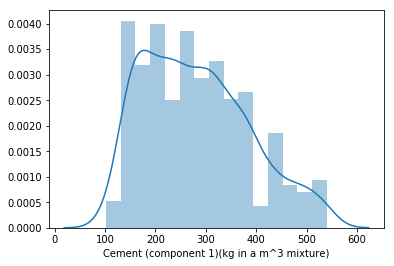

Blast Furnace Slag (component 2)(kg in a m^3 mixture)


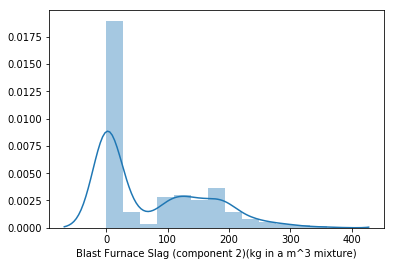

Fly Ash (component 3)(kg in a m^3 mixture)


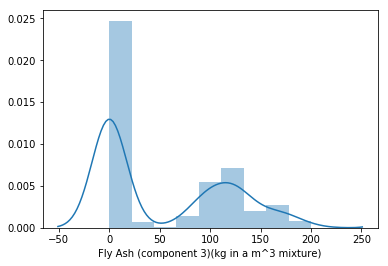

Water  (component 4)(kg in a m^3 mixture)


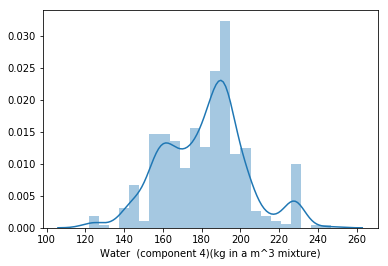

Superplasticizer (component 5)(kg in a m^3 mixture)


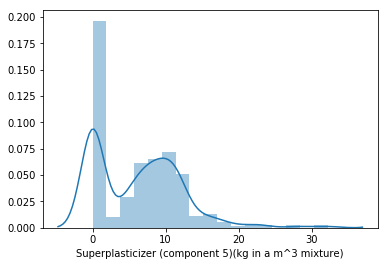

Coarse Aggregate  (component 6)(kg in a m^3 mixture)


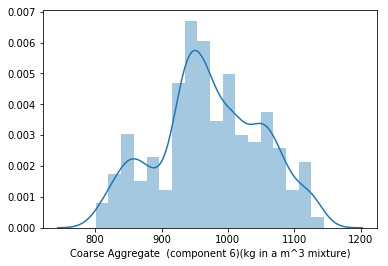

Fine Aggregate (component 7)(kg in a m^3 mixture)


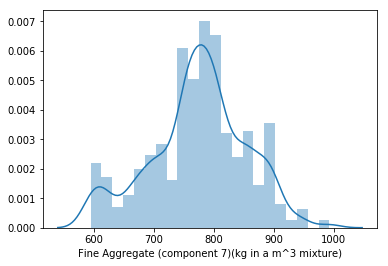

Age (day)


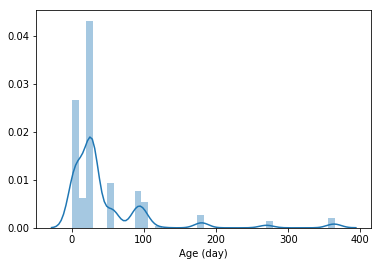

Concrete compressive strength(MPa, megapascals) 


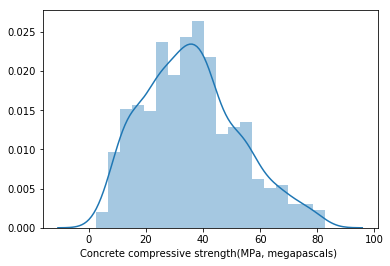

In [5]:
# cheking distribution of data
l = list(data.columns.values) 
def plot(data):
    
    for col in l:
        #plt.hist(data[col])
        sns.distplot(data[col])
        print(col)
        plt.show()
    
    
plot(data)



In [6]:
# normal x and y
data.head()
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

lr.fit(X,y)

y_pred = lr.predict(X)

mse = mean_squared_error(y,y_pred)
mae = mean_absolute_error(y,y_pred)
r2 = r2_score(y,y_pred)

print(mse,mae,r2)




(107.21180273450533, 8.214899392828647, 0.6154647342687214)


In [7]:
#     slit dataset in train and test dataset without feature engineering

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
y_pred1

mse1 = mean_squared_error(y_test,y_pred1)
mae1 = mean_absolute_error(y_test,y_pred1)
r2_1 = r2_score(y_test,y_pred1)

print(mse1,mae1,r2_1)

(102.04791908847297, 7.959349184719422, 0.5801629557846495)


In [8]:
# prediction using Polynomial feature

pf = PolynomialFeatures(degree = 2 )

lr.fit((pf.fit_transform(X_train)),y_train)
y_pred2  = lr.predict(pf.transform(X_test))

mse2 = mean_squared_error(y_test,y_pred2)
mae2 = mean_absolute_error(y_test,y_pred2)
r2_2 = r2_score(y_test,y_pred2)

print(mse2,mae2,r2_2)

#lr.coef_

(60.24521477068869, 5.869912643965133, 0.7521441581232404)


In [9]:
# plt.scatter(X_test,y_pred2[:,np.newaxis])
#plt.show()

#plt.scatter(X_train.iloc[:,0],y_train)
#plt.scatter(X_test.iloc[:,0],y_test)
#plt.plot(np.sort(X_test),np.sort(y_pred2))
# plt.plot(np.sort(y_pred2),X_test.iloc[:,0])

# plt.show()


# X_test.shape
# y_pred2.shape

Cement (component 1)(kg in a m^3 mixture)


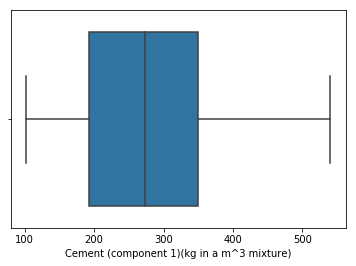

Blast Furnace Slag (component 2)(kg in a m^3 mixture)


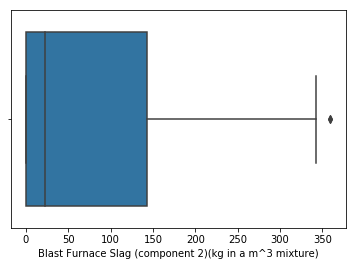

Fly Ash (component 3)(kg in a m^3 mixture)


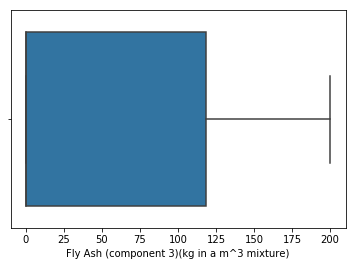

Water  (component 4)(kg in a m^3 mixture)


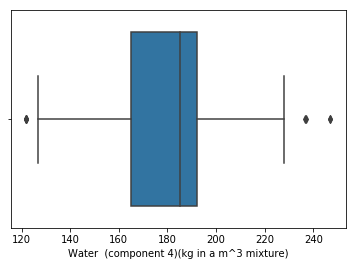

Superplasticizer (component 5)(kg in a m^3 mixture)


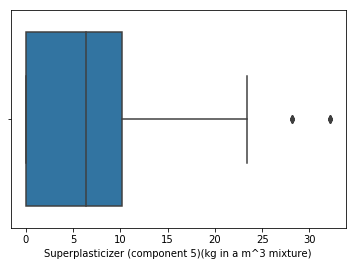

Coarse Aggregate  (component 6)(kg in a m^3 mixture)


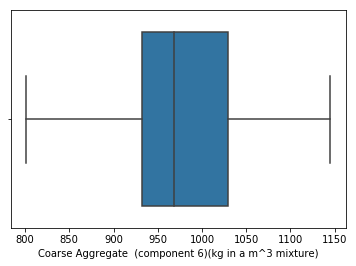

Fine Aggregate (component 7)(kg in a m^3 mixture)


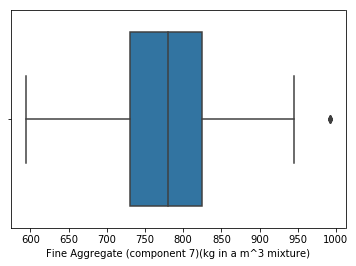

Age (day)


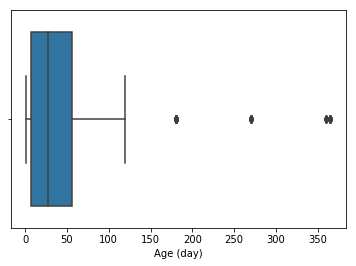

Concrete compressive strength(MPa, megapascals) 


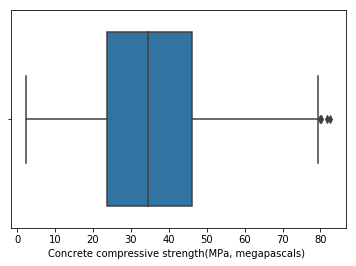

In [10]:
#seeing outliers in each variable


for col in l:
    
    sns.boxplot(data[col])
    print(col)
    plt.show()


From here actual feature engineering begins

In [11]:
data.quantile(0.02)

Cement (component 1)(kg in a m^3 mixture)                133.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture)      0.000000
Fly Ash (component 3)(kg in a m^3 mixture)                 0.000000
Water  (component 4)(kg in a m^3 mixture)                140.750000
Superplasticizer (component 5)(kg in a m^3 mixture)        0.000000
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     822.000000
Fine Aggregate (component 7)(kg in a m^3 mixture)        594.000000
Age (day)                                                  3.000000
Concrete compressive strength(MPa, megapascals)            8.035043
Name: 0.02, dtype: float64

In [12]:
# now removing outliers..............

def outlier_range(data):

    data2 = data.copy()

    for col in l:
        data2[col] = data2[col].fillna(data2[col].mean())
        
        
    quantile_value1 = data2.quantile(0.02)
    quantile_value2 = data2.quantile(0.99)
    #index = quantile_value1.index.values
    
    for i in l:
        data2 = data2[(data2[i] >= quantile_value1[i]) & (data2[i] <= quantile_value2[i]) ]
    return data2

In [13]:
outlier_range(data)
data2 =  outlier_range(data)

Cement (component 1)(kg in a m^3 mixture)


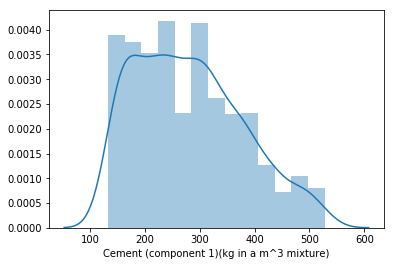

Blast Furnace Slag (component 2)(kg in a m^3 mixture)


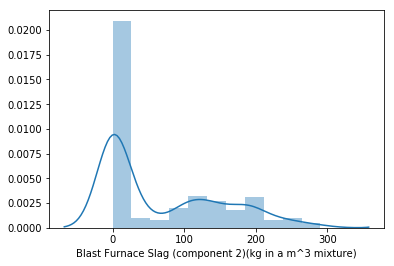

Fly Ash (component 3)(kg in a m^3 mixture)


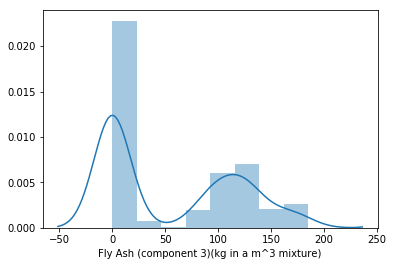

Water  (component 4)(kg in a m^3 mixture)


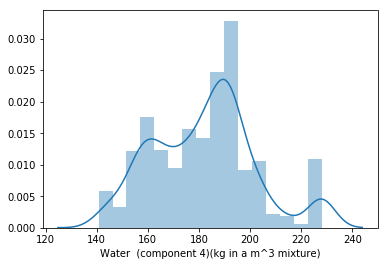

Superplasticizer (component 5)(kg in a m^3 mixture)


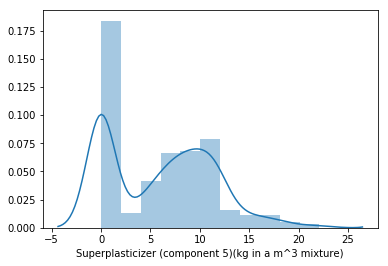

Coarse Aggregate  (component 6)(kg in a m^3 mixture)


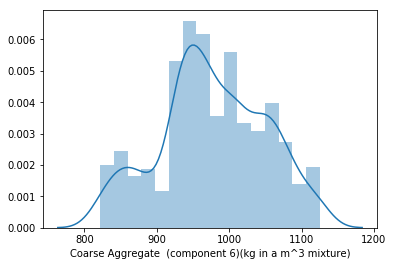

Fine Aggregate (component 7)(kg in a m^3 mixture)


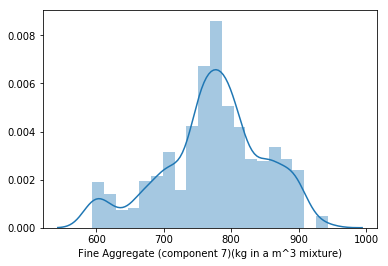

Age (day)


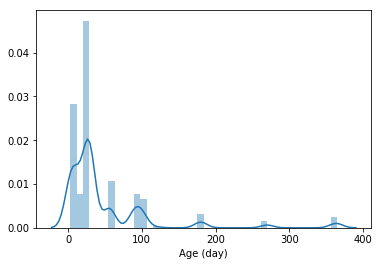

Concrete compressive strength(MPa, megapascals) 


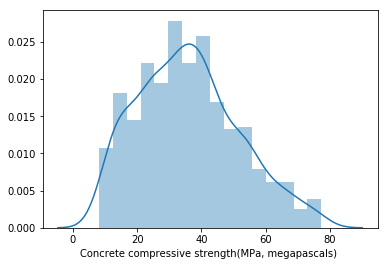

In [14]:
#data2 = data.copy()
# cheking distribution of data to see skewness
l = list(data.columns.values) 
def plot2(data2):
    
    for col in l:
        #plt.hist(data[col])
        sns.distplot(data2[col])
        print(col)
        plt.show()
    
    
plot2(data2)

In [15]:
# removing skewness from data

from scipy.stats import skew

def skewnesslog1(data2):
    
#     for col in l:
#         data2[col] = data2[col].fillna(data2[col].mean())

#     for col in l:
       
#         print(skew(data2[col]))
#     print('--------')
        
    
    for i in l:
        data2[i] = np.log(data2[i] + 100)

    
#     for i in l:
#          print(skew(data2[i]))

    return data2















# for i in l:  #l me required column names dal
#     dataframe[i] = np.sqrt(dataframe[i])
    
    

In [32]:
data2 = skewnesslog1(data2)
#data2
for col in l:
    data2[col] = data2[col].fillna(0)
data2

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,4.650252,4.650292,4.650105,4.650398,4.650084,4.650136,4.649945,4.650487,4.650225
1,4.650252,4.650292,4.650105,4.650398,4.650084,4.650136,4.649945,4.650554,4.650230
2,4.650113,4.650283,4.650105,4.650243,4.650084,4.650198,4.650259,4.650551,4.650249
3,4.650190,4.650266,4.650105,4.650398,4.650084,4.650136,4.650060,4.650288,4.650264
4,4.650291,4.650247,4.650105,4.650398,4.650084,4.650136,4.649945,4.650554,4.650245
5,4.650291,4.650247,4.650105,4.650398,4.650084,4.650136,4.649945,4.650169,4.650202
6,4.650190,4.650266,4.650105,4.650398,4.650084,4.650136,4.650060,4.650169,4.650258
7,4.650358,4.650107,4.650105,4.650398,4.650084,4.650136,4.649945,4.650169,4.650219
8,4.650113,4.650283,4.650105,4.650243,4.650084,4.650198,4.650259,4.650288,4.650212
9,4.650113,4.650283,4.650105,4.650243,4.650084,4.650198,4.650259,4.650169,4.650148


Cement (component 1)(kg in a m^3 mixture)


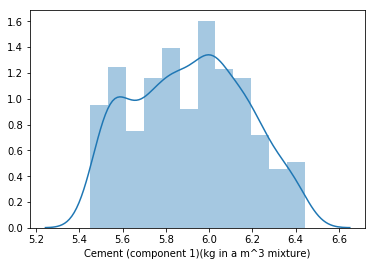

Blast Furnace Slag (component 2)(kg in a m^3 mixture)


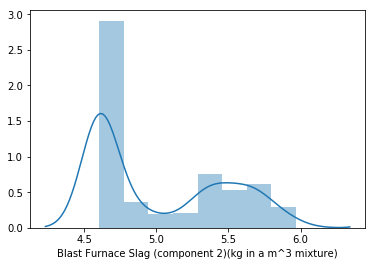

Fly Ash (component 3)(kg in a m^3 mixture)


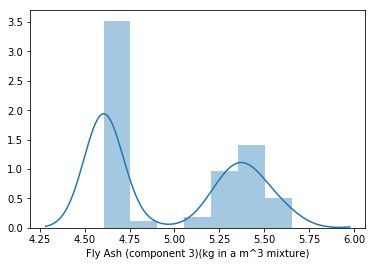

Water  (component 4)(kg in a m^3 mixture)


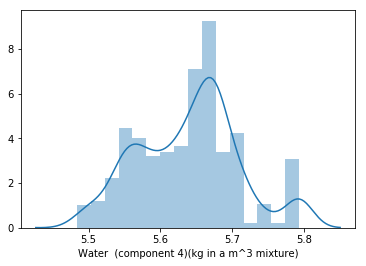

Superplasticizer (component 5)(kg in a m^3 mixture)


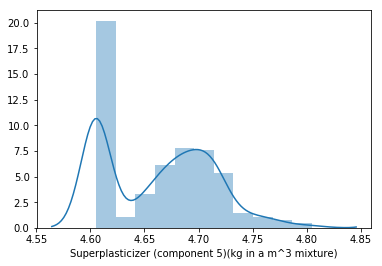

Coarse Aggregate  (component 6)(kg in a m^3 mixture)


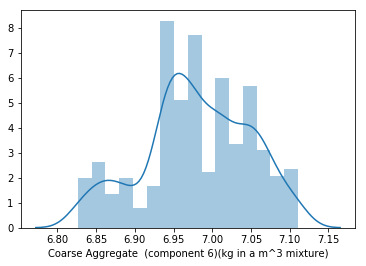

Fine Aggregate (component 7)(kg in a m^3 mixture)


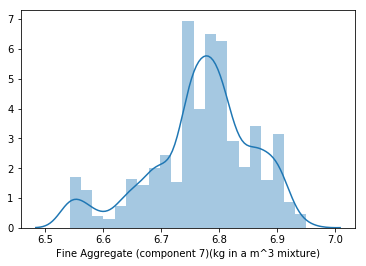

Age (day)


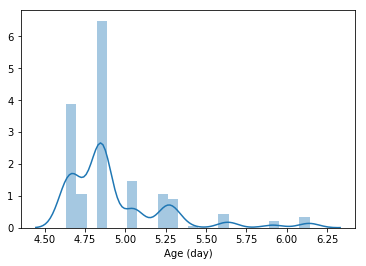

Concrete compressive strength(MPa, megapascals) 


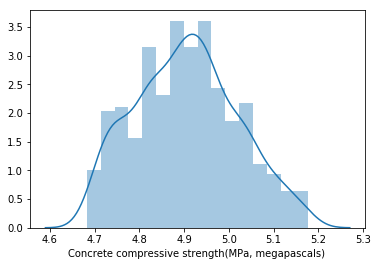

In [17]:
def plot3(data2):
    
    for col in l:
        #plt.hist(data[col])
        sns.distplot(data2[col])
        #res = s
        print(col)
        plt.show()
    
    
plot3(data2)

In [18]:
# standardization , making values in range for making compution easy
from sklearn.preprocessing import StandardScaler

stand_scale= StandardScaler()
data2 = stand_scale.fit_transform(data2)
data2 = pd.DataFrame(data2)
data2.columns = data.columns
#data2

data2

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,0.620137,1.036673,-0.911161,2.173034,-1.134398,-0.589728,-2.555343,3.121335,0.336015
1,0.620137,1.036673,-0.911161,2.173034,-1.134398,-0.589728,-2.555343,3.847800,0.384958
2,-0.832123,0.944013,-0.911161,0.527336,-1.134398,0.053724,0.692210,3.813434,0.584773
3,-0.034298,0.764355,-0.911161,2.173034,-1.134398,-0.589728,-1.382972,1.002734,0.749739
4,1.028613,0.561844,-0.911161,2.173034,-1.134398,-0.589728,-2.555343,3.847800,0.548285
5,1.028613,0.561844,-0.911161,2.173034,-1.134398,-0.589728,-2.555343,-0.252871,0.093211
6,-0.034298,0.764355,-0.911161,2.173034,-1.134398,-0.589728,-1.382972,-0.252871,0.679181
7,1.736496,-0.892753,-0.911161,2.173034,-1.134398,-0.589728,-2.555343,-0.252871,0.274406
8,-0.832123,0.944013,-0.911161,0.527336,-1.134398,0.053724,0.692210,1.002734,0.197365
9,-0.832123,0.944013,-0.911161,0.527336,-1.134398,0.053724,0.692210,-0.252871,-0.467058


In [19]:
#np.random.seed(150)
#now spliting data in train and test dataset with feature engineering
X = data2.iloc[:,:-1]
y = data2.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
y_pred1

mse1 = mean_squared_error(y_test,y_pred1)
mae1 = mean_absolute_error(y_test,y_pred1)
r2_1 = r2_score(y_test,y_pred1)

print(mse1,mae1,r2_1)

(0.26069806717213834, 0.41963719474033495, 0.7644472352971103)


In [20]:
#with PolynomialFeatures
pf = PolynomialFeatures(degree = 2 )

lr.fit((pf.fit_transform(X_train)),y_train)
y_pred2  = lr.predict(pf.transform(X_test))

mse2 = mean_squared_error(y_test,y_pred2)
mae2 = mean_absolute_error(y_test,y_pred2)
r2_2 = r2_score(y_test,y_pred2)

print(mse2,mae2,r2_2)

(0.1556472078102025, 0.30226148316115736, 0.8593655468347995)


In [21]:
model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(X_train, y_train)

rid_pred = model.predict(X_test)
rid_mse = mean_squared_error(y_test,rid_pred)
rid_mae = mean_absolute_error(y_test,y_pred2)
rid_r2_2 = r2_score(y_test,y_pred2)
print(rid_mse,rid_mae,rid_r2_2)

(0.11116151440684371, 0.30226148316115736, 0.8593655468347995)


In [22]:
#Ridge to fix overfitting


model = make_pipeline(PolynomialFeatures(3), Ridge(alpha=0.002))
model.fit(X_train, y_train)

rid_pred = model.predict(X_test)
rid_mse = mean_squared_error(y_test,rid_pred)
rid_mae = mean_absolute_error(y_test,y_pred2)
rid_r2_2 = r2_score(y_test,y_pred2)
print(rid_mse,rid_mae,rid_r2_2)


(0.111120804605835, 0.30226148316115736, 0.8593655468347995)


In [23]:
#Lasso to fix overfitting
model = make_pipeline(PolynomialFeatures(3), Lasso(alpha=0.005))
model.fit(X_train, y_train)

lasso_pred = model.predict(X_test)
lasso_mse = mean_squared_error(y_test,lasso_pred)
lasso_mae = mean_absolute_error(y_test,y_pred2)
lasso_r2_2 = r2_score(y_test,y_pred2)
print(lasso_mse,lasso_mae,lasso_r2_2)


(0.08330555048908783, 0.30226148316115736, 0.8593655468347995)


In [24]:
# model = make_pipeline(PolynomialFeatures(2), Lasso(alpha=0.01))
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
# print(scores.mean())

In [25]:
poly = PolynomialFeatures(3)
X2 = poly.fit_transform(X)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.30)

In [26]:
# Recursive Feature Elimination  #backward elemination
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import LinearRegression

# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()  #r2 

#X, y = data2.iloc[:,:-1], data2.iloc[:,-1]

# create the RFE model and select 3 attributes
rfe = RFE(model, 50)
rfe = rfe.fit(X2_train, y2_train)

# summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)
rfe_pred = rfe.predict(X2_test)
mse_rfe = mean_squared_error(y2_test,rfe_pred)
mae_rfe = mean_absolute_error(y2_test,rfe_pred)
r2_rfe = r2_score(y2_test,rfe_pred)

print(mse_rfe, mae_rfe, r2_rfe)

(0.1273297646695362, 0.2786561607491667, 0.8777547072953675)


In [27]:
len(rfe.support_)

165

In [28]:
# rf = RandomForestRegressor(n_estimators=100, random_state=10)
# rf.fit(X_train, y_train)
# rf_pred = rf.predict(X_test)
# mse_rfe = mean_squared_error(y_test, rf_pred)
# mae_rfe = mean_absolute_error(y_test, rf_pred)
# r2_rfe = r2_score(y_test, rf_pred)
# print(mse_rfe, mae_rfe, r2_rfe)

In [29]:
#print(sorted(rf.feature_importances_, reverse=True))

In [30]:


#df1['fixed acidity']
#a= df2['fixed acidity'][(df2['fixed acidity'] > fence_high['fixed acidity']) & (df1['fixed acidity'] < fence_low['fixed acidity'])]
#a = iqr['fixed acidity']
# ids = a.index.values
# for i in ids:
#     a[i] = iqr['fixed acidity']
    
    
# #b = df1['fixed acidity']
# ind = a.index.values
# for i in ind:
#     df1['fixed acidity'][i] = iqr['fixed acidity']

#iqr['fixed acidity']    
# df1['fixed acidity']
# df1['fixed acidity'][205] = iqr['fixed acidity']
# df1['fixed acidity'][205]




# # pd.merge()
# #df1['fixed acidity']
# # a.index.name
# pd.merge(df1['fixed acidity'],a,left_on='fixed acidity',right_index=True)